# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [4]:
all_cities = []
lat=[]
lng=[]
cloudiness=[]
wind_speed=[]
temp_max=[]
humidity=[]
country=[]
date=[]

#Create a counter for sucessive API calls
city_count = 0
set_count = 1

In [5]:

for one_city in cities:
    
 
    try:
        params = f'q={one_city}&appid={weather_api_key}&units={units}'
        response = requests.get(url + params).json()
        
        city_count = city_count + 1
          
        all_cities.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        
        print(f'Processing Record {city_count} of {set_count}|{one_city}')
    
    except (KeyError):
        print("City not found. Skipping...")
        
        if city_count > 50: 
            set_count += 1 
            city_count = 0 

        time.sleep(2)



#Data retrieval is complete
print("Data Retrieval is Complete")

Beginning Data Retrieval
------------------------------
Processing Record 1 of 1|ixtapa
Processing Record 2 of 1|hamada
Processing Record 3 of 1|hermanus
City not found. Skipping...
Processing Record 5 of 1|mpika
Processing Record 6 of 1|punta arenas
Processing Record 7 of 1|mareeba
Processing Record 8 of 1|atuona
Processing Record 9 of 1|iguatemi
Processing Record 10 of 1|saint-pierre
Processing Record 11 of 1|mataura
Processing Record 12 of 1|ushuaia
Processing Record 13 of 1|puerto ayora
Processing Record 14 of 1|avarua
Processing Record 15 of 1|geraldton
Processing Record 16 of 1|oranjemund
Processing Record 17 of 1|hobart
City not found. Skipping...
Processing Record 19 of 1|esperance
Processing Record 20 of 1|kudahuvadhoo
Processing Record 21 of 1|gavle
Processing Record 22 of 1|kotdwara
Processing Record 23 of 1|bluff
Processing Record 24 of 1|tessalit
Processing Record 25 of 1|ola
City not found. Skipping...
Processing Record 27 of 1|sur
Processing Record 28 of 1|bredasdorp
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_dict = ({"City": all_cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

weather_df = pd.DataFrame(weather_dict)
weather_df.head(14)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ixtapa,20.7000,-105.2000,77.23,78,40,8.05,MX,1651980007
1,Hamada,34.8833,132.0833,63.32,53,39,14.20,JP,1651980008
2,Hermanus,-34.4187,19.2345,58.48,81,99,4.25,ZA,1651980008
3,Mpika,-11.8343,31.4529,55.69,95,94,3.74,ZM,1651980012
4,Punta Arenas,-53.1500,-70.9167,44.71,70,75,1.14,CL,1651979913
5,Mareeba,-17.0000,145.4333,73.49,93,100,4.81,AU,1651980012
6,Atuona,-9.8000,-139.0333,78.91,72,38,14.90,PF,1651980013
7,Iguatemi,-23.6803,-54.5611,59.16,86,25,3.96,BR,1651979959
8,Saint-Pierre,-21.3393,55.4781,71.91,68,0,8.05,RE,1651980013
9,Mataura,-46.1927,168.8643,58.48,94,100,0.74,NZ,1651980014


In [7]:
print(weather_df.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
Country        object
Date            int64
dtype: object


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#Clean dataframe
weather_df = weather_df.dropna(how= "any")

In [9]:
#Save data into a csv 
filename = "cities.csv"
weather_df.to_csv("output_data/cities.csv", index=False, header=True)

In [10]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,5.680000e+02
mean,20.995262,18.362874,60.586232,70.776408,55.130282,8.201074,1.651980e+09
std,33.992919,88.618452,18.368190,21.730050,40.658000,5.907012,1.316962e+02
min,-54.800000,-179.166700,4.510000,1.000000,0.000000,0.000000,1.651980e+09
25%,-8.001850,-57.974950,47.855000,58.000000,9.000000,3.927500,1.651980e+09
50%,26.545200,24.075400,60.900000,76.000000,62.500000,6.910000,1.651980e+09
75%,50.644925,97.250000,76.090000,88.000000,99.000000,11.500000,1.651980e+09
max,78.218600,179.316700,97.570000,100.000000,100.000000,35.680000,1.651980e+09


In [11]:
weather_df["Humidity"].max()

100

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

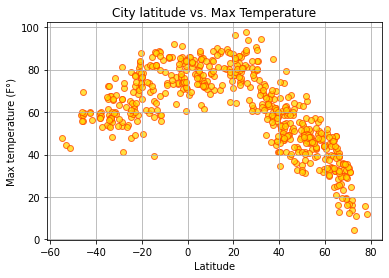

In [13]:
# Variables 
humidity_p=weather_df["Humidity"]
cloud_p=weather_df["Cloudiness"]
wind_sp = weather_df["Wind Speed"]
latitude_p = weather_df["Lat"]
temp_p= weather_df["Max Temp"]

plt.scatter(latitude_p, temp_p, marker="o", facecolors="gold", edgecolors="orangered",
             alpha=0.75)
plt.grid(True)
plt.title( "City latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F°)")

plt.savefig("sp_latitude_vs_maxtemp.png")

## Latitude vs. Humidity Plot

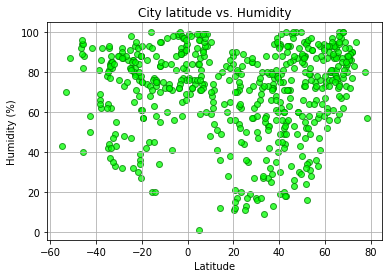

In [14]:
plt.scatter(latitude_p, humidity_p, marker="o", facecolors="lime", edgecolors="green",
             alpha=0.75)
plt.grid(True)
plt.title( "City latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("sp_latitude_vs_humidity.png")

## Latitude vs. Cloudiness Plot

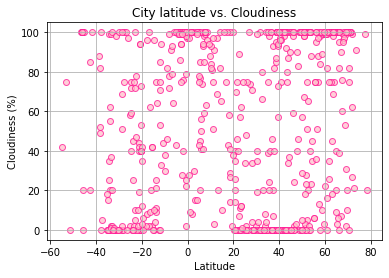

In [15]:
plt.scatter(latitude_p, cloud_p, marker="o", facecolors="pink", edgecolors="deeppink",
             alpha=0.75)
plt.grid(True)
plt.title( "City latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("sp_latitude_vs_Cloudiness.png")

## Latitude vs. Wind Speed Plot

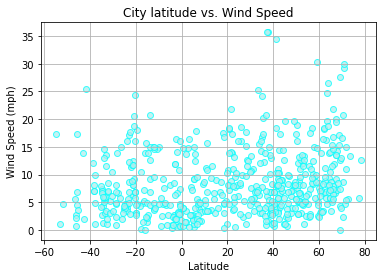

In [16]:
plt.scatter(latitude_p, wind_sp, marker="o", facecolors="paleturquoise", edgecolors="cyan",
             alpha=0.75)
plt.grid(True)
plt.title( "City latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("sp_latitude_vs_wind.png")

## Linear Regression

In [17]:

weather_df["Lat"] = weather_df["Lat"].astype(float)
weather_df["Lng"] = weather_df["Lng"].astype(float)
weather_df["Max Temp"] = weather_df["Max Temp"].astype(float)
weather_df["Humidity"] = weather_df["Humidity"].astype(float)
weather_df["Cloudiness"] = weather_df["Cloudiness"].astype(float)
weather_df["Wind Speed"] = weather_df["Wind Speed"].astype(float)

north_hem = weather_df[weather_df['Lat'] > 0]
south_hem= weather_df[weather_df['Lat'] < 0]

north_hem.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ixtapa,20.7000,-105.2000,77.23,78.0,40.0,8.05,MX,1651980007
1,Hamada,34.8833,132.0833,63.32,53.0,39.0,14.20,JP,1651980008
17,Kudahuvadhoo,2.6708,72.8944,84.29,76.0,30.0,14.79,MV,1651980020
18,Gävle,60.6745,17.1417,31.91,52.0,0.0,3.00,SE,1651980020
19,Kotdwāra,29.7500,78.5333,90.63,17.0,2.0,4.43,IN,1651980021
21,Tessalit,20.1986,1.0114,77.40,11.0,0.0,10.83,ML,1651980021
22,Ola,59.5833,151.2833,33.01,94.0,99.0,2.57,RU,1651980022
23,Sur,22.5667,59.5289,86.54,54.0,0.0,3.67,OM,1651980029
26,Fortuna,40.5982,-124.1573,52.66,79.0,75.0,6.91,US,1651980030
27,Tuktoyaktuk,69.4541,-133.0374,35.60,80.0,20.0,12.66,CA,1651980030


In [18]:
north_hem["Max Temp"]

0      77.23
1      63.32
17     84.29
18     31.91
19     90.63
       ...  
562    72.19
563    51.87
564    96.28
566    72.55
567    85.64
Name: Max Temp, Length: 389, dtype: float64

In [19]:
print(south_hem.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date            int64
dtype: object


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.87
The r-squared is: 0.762429094206857
y = -0.86x + 91.56


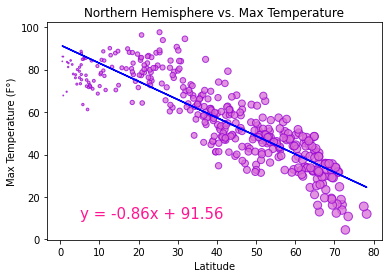

In [20]:
# Equations for correlation and regression

correlation = st.pearsonr(north_hem["Lat"], north_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem["Lat"], north_hem["Max Temp"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

plt.title( "Northern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(5,10),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig("N_vs_maxtemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.64
The r-squared is: 0.4058992796635079
y = 0.55x + 80.24


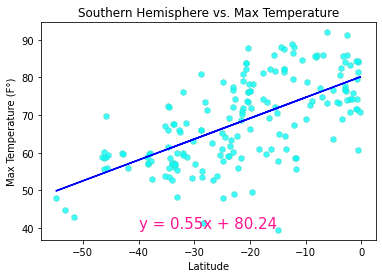

In [21]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Max Temp"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem["Lat"], south_hem["Max Temp"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")


plt.title( "Southern Hemisphere vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F°)")

plt.annotate(line_eq,(-40,40),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig("S_vs_maxtemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.15
The r-squared is: 0.023110215916808126
y = 0.17x + 62.23


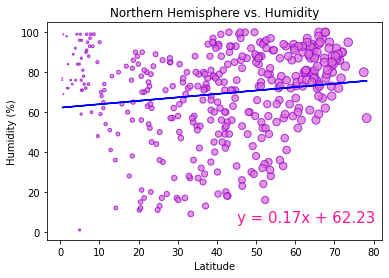

In [22]:

correlation = st.pearsonr(north_hem["Lat"], north_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(north_hem["Lat"], north_hem["Humidity"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

plt.title( "Northern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(45,5),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig("N_vs_humidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is 0.13
The r-squared is: 0.01818885368978675
y = 0.19x + 78.33


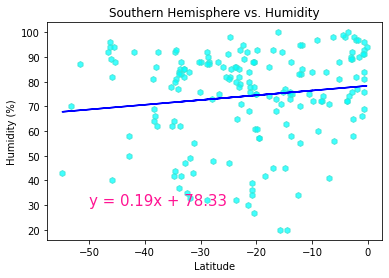

In [23]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Humidity"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem["Lat"], south_hem["Humidity"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")

plt.title( "Southern Hemisphere vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-50,30),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig("S_vs_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.11
The r-squared is: 0.013169830666948046
y = 0.23x + 48.62


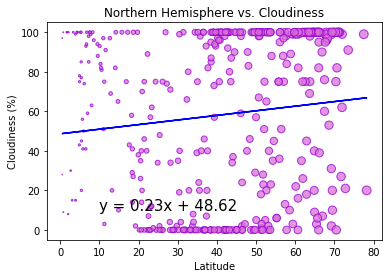

In [24]:
correlation = st.pearsonr(north_hem["Lat"], north_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Cloudiness"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 

plt.scatter(north_hem["Lat"], north_hem["Cloudiness"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")


plt.title( "Northern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.annotate(line_eq,(10,10),fontsize=15,color="black")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)

plt.savefig("N_vs_cloudiness.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.25
The r-squared is: 0.06335088371444353
y = 0.75x + 64.73


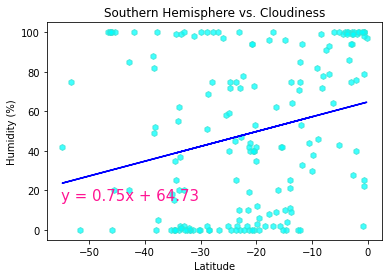

In [25]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Cloudiness"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Cloudiness"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(south_hem["Lat"], south_hem["Cloudiness"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")
plt.title( "Southern Hemisphere vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.annotate(line_eq,(-55,15),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig("S_vs_cloudiness.png")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.19
The r-squared is: 0.03711926666954975
y = 0.06x + 6.39


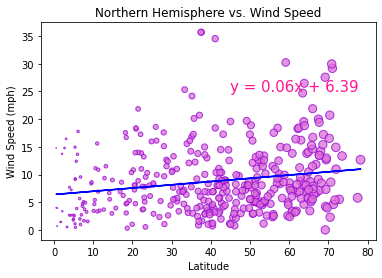

In [26]:
correlation = st.pearsonr(north_hem["Lat"], north_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"], north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(north_hem["Lat"], north_hem["Wind Speed"], marker="o", facecolors="orchid", edgecolors="darkviolet",
            s=north_hem["Lat"], alpha=0.75)
plt.plot(north_hem["Lat"],regress_values,"b-")

plt.title( "Northern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(45,25),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig("N_vs_windspeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.07
The r-squared is: 0.004637693576651965
y = -0.03x + 6.42


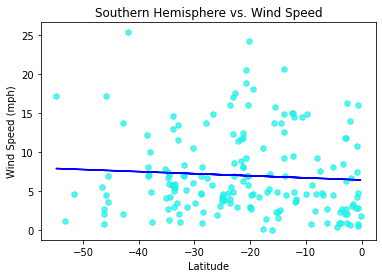

In [27]:
correlation = st.pearsonr(south_hem["Lat"], south_hem["Wind Speed"])
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"], south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(south_hem["Lat"], south_hem["Wind Speed"], marker="h", facecolors="cyan", edgecolors="turquoise",
            s= None, alpha=0.75)
plt.plot(south_hem["Lat"],regress_values,"b-")
plt.title( "Southern Hemisphere vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.annotate(line_eq,(-25,27),fontsize=15,color="deeppink")
print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"The r-squared is: {rvalue**2}")
print(line_eq)
plt.savefig("S_vs_windspeed.png")